In [1]:
import numpy as np
np.random.choice([0,-1,-2])
Qsol = np.load('Qsol.npy')

In [2]:
# Ennvironment setup
# Variables
#   sizeX, sizeY : size of the gridworld
# 
# Functions
#   stateNum : input(x,y)= coordinate, output= state number
#   stateNumToCoord : input(st)= state number, output[x,y]= coordinate
#   keepInside : input(x,y)= coordinate, output[x,y]= coordinate
#   moveAgent : input(x,y,a)= coordinate, action, output[x,y]=coordinate
#   wind : input(x,y)=coordinate, output[x,y]=coordinate

def softmax(x, k=1):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(k*x - np.max(k*x))
    return e_x / e_x.sum(axis=0) # only difference

sizeX = 6
sizeY = 5
nstate = sizeX*sizeY
naction =4
def stateNum(x, y):
    return(int(x + (y-1) *sizeX -1))

dicAction = {'up':1, 'left':2, 'down':3, 'right':4}
dicAction2 = {1:'up', 2:'<-', 3:'dn', 4:'->'}

def stateNumToCoord(st):
    return([st % sizeX +1, 1+st // sizeX])  # //, %  division and the remainder

def keepInside(x, y):    
    if (x<1): 
        x=1
    elif (x>sizeX):
        x=sizeX
        
    if (y<1):
        y=1
    elif (y>sizeY):
        y=sizeY
        
    return([x,y])

goalState = stateNum(4,3)



def moveAgent(x, y, a):
   # if (stateNum(x, y) == goalState):
   #     return([x,y])
    if a in dicAction:
        a = dicAction[a]
    
    if (a == 1):
        y = y - 1
    if (a == 2):
        x = x - 1
    if (a == 3):
        y = y + 1
    if (a == 4):
        x = x + 1
    
    return(keepInside(x,y))

def wind(x,y):    
    if (x in [2,5]):
        
        y=y-np.random.choice([0,1,2])
    if (x in [3,4]):
        y=y-np.random.choice([1,2,3])
    return(keepInside(x,y))

def prMoveAgent(prIstate, a):
   # if (stateNum(x, y) == goalState):
   #     return([x,y])
    cumPr = np.zeros(nstate)
    cumPr[goalState] = prIstate[goalState]
    for istate in range(nstate):
        if (istate != goalState and prIstate[istate] > 0):
            x, y = stateNumToCoord(istate)
            pr = np.zeros(nstate)
               
            if a in dicAction:
                a = dicAction[a]
    
            if (a == 1):
                y = y - 1
            if (a == 2):
                x = x - 1
            if (a == 3):
                y = y + 1
            if (a == 4):
                x = x + 1
            x, y = keepInside(x,y)
            pr[stateNum(x,y)]=1
            cumPr = cumPr + prIstate[istate]*pr
            
    return(cumPr)
    

def prWind(prIstate):
    cumPr = np.zeros(nstate)    
    cumPr[goalState] = prIstate[goalState]
    for istate in range(nstate):
        if (istate != goalState and prIstate[istate] > 0):
            x, y = stateNumToCoord(istate)                
            pr = np.zeros(nstate)   
            if (x in [2,5]):
                x = np.ones(3)*x
                y = np.array([y, y-1, y-2])     
            elif (x in [3,4]):
                x = np.ones(3)*x
                y = np.array([y-1, y-2, y-3])     
            else:
                x = np.array([x])
                y = np.array([y])
            prob = 1/x.shape[0]            
            for i in range(x.shape[0]):                
                xTemp, yTemp = keepInside(x[i], y[i])
                pr[stateNum(xTemp, yTemp)]=pr[stateNum(xTemp, yTemp)]+prob
            
            cumPr = cumPr + prIstate[istate]*pr   
    
    
    
    return(cumPr)

In [3]:
class prWindyGW:
    def __init__(self, x=None, y=None):
        self.sizeX = 6
        self.sizeY = 5
        self.nstate = self.sizeX*self.sizeY
        self.naction = 4
        self.goalState = stateNum(4,3)
        if (x == None):
            while True:
                self.x, self.y = np.random.choice(range(sizeX))+1, np.random.choice(range(sizeY))+1
                if stateNum(self.x,self.y) != goalState:
                    break
        elif (y == None): 
            print("warning x is not given but y is given!!!")
            self.x = x
            self.y = np.random.choice(range(sizeY))+1
        else:
            self.x = x
            self.y = y
        #self.obs = stateNum(self.x,self.y)          
    
    def moveAgent(self, a):    
        if (a == 1):
            self.y = self.y - 1
        if (a == 2):
            self.x = self.x - 1
        if (a == 3):
            self.y = self.y + 1
        if (a == 4):
            self.x = self.x + 1
                
    def keepInside(self):
        if (self.x<1): 
            self.x=1
        elif (self.x>self.sizeX):
            self.x=self.sizeX
        
        if (self.y<1):
            self.y=1
        elif (self.y>self.sizeY):
            self.y=self.sizeY              
        
    def wind(self):
        if (self.x in [2,5]):
            self.y=self.y-np.random.choice([0,1,2])
        if (self.x in [3,4]):
            self.y=self.y-np.random.choice([1,2,3])
                
    def step(self,action):  # observation, reward, done, info
        if ([self.x, self.y] == stateNumToCoord(self.goalState)):
            print("It in the terminal State. Nothing will change.")
            return([self.goalState, 0, True, None])
        self.wind()        
        self.moveAgent(action)
        self.keepInside()
        obs = stateNum(self.x, self.y)
        reward = -1
        if (obs == goalState):
            done = True            
        else:
            done = False
        info=None
        self.x, self.y = stateNumToCoord(obs)
        return([obs, reward, done, info])     
                
    
    
    

1 4
30


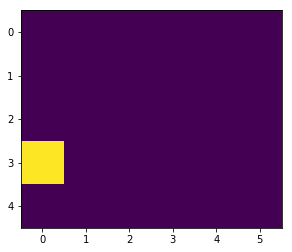

In [4]:
env = prWindyGW(1,3)

obs, reward, done, info = env.step(3)
print (env.x, env.y)
print(env.nstate)
vState = np.zeros(env.nstate)
vState[obs]=1
matState = np.reshape(vState, (env.sizeY, env.sizeX))
import matplotlib.pyplot as plt
plt.imshow(matState)
plt.show()

1 5


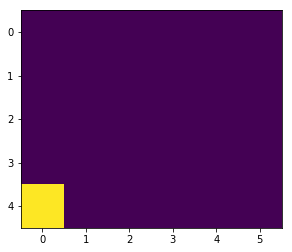

False
15
[4, 3]


In [5]:
obs, reward, done, info = env.step(3)
print (env.x, env.y)
vState = np.zeros(env.nstate)
vState[obs]=1
matState = np.reshape(vState, (env.sizeY, env.sizeX))
import matplotlib.pyplot as plt
plt.imshow(matState)
plt.show()
print(done)
print(goalState)
print(stateNumToCoord(goalState))

In [7]:
# What should be epsilon?
# What should be alpha?

# epsilon : how much more exploration???
# alpha : learning rate...

epsilon=1
alpha = 0.3
Q = np.zeros((env.nstate, env.naction))
nQ = np.zeros((env.nstate, env.naction))
for i in range(10000):
    env = prWindyGW(1,3)

    totalReward =0
    

    #epsilon=epsilon*0.999
    alpha = max(alpha*0.99, 0.01)
    epsilon = max(epsilon*0.99, 0.01)
    
    stateBefore = None
    actionBefore = None
    iteration = 1
    while True:
        state = stateNum(env.x, env.y)
        vQ = Q[state,:]
        vQmax = np.ndarray.max(vQ)    
        actionlist = np.arange(naction)
        actionMax = np.random.choice(actionlist[vQ == vQmax])
        
        if (np.random.uniform(0,1)<epsilon):
            action = np.random.choice(range(naction))
        else:
            action = actionMax
            
        nQ[state, action] +=1
        obs, reward, done, info=env.step(action+1)
            
        if (stateBefore != None) and (actionBefore != None):
            #Q[state,actionBefore]= (1-alpha)*Q[state,actionBefore] + alpha*(reward + Q[obs,actionMax])
            #Q[state,actionBefore]= Q[state,actionBefore]+ alpha*(reward + Q[obs,actionMax]-Q[state,actionBefore])
            Q[state,action]= Q[state,action]+ alpha*(reward + max(Q[obs,:])-Q[state,action])
                            
        totalReward += reward
                
        if (done): 
            break;
            
        stateBefore = obs
        actionBefore = action
        #epsilon=epsilon*0.99
    if (i % 100 == 0):
        print(i, "-th iteration, with epsilon=",epsilon,", alpha=",alpha,", Total reward=", totalReward)
        print("SSQ =", np.sum((Q-Qsol)**2))

0 -th iteration, with epsilon= 0.99 , alpha= 0.297 , Total reward= -58
SSQ = 12611.3179022
100 -th iteration, with epsilon= 0.36237201786049694 , alpha= 0.10871160535814905 , Total reward= -12
SSQ = 417.574362998
200 -th iteration, with epsilon= 0.13263987810938213 , alpha= 0.03979196343281463 , Total reward= -17
SSQ = 353.572938653
300 -th iteration, with epsilon= 0.0485504851305729 , alpha= 0.014565145539171856 , Total reward= -16
SSQ = 306.360119316
400 -th iteration, with epsilon= 0.017771047742294682 , alpha= 0.01 , Total reward= -17
SSQ = 297.33893301
500 -th iteration, with epsilon= 0.01 , alpha= 0.01 , Total reward= -40
SSQ = 281.23119972
600 -th iteration, with epsilon= 0.01 , alpha= 0.01 , Total reward= -17
SSQ = 270.118781999
700 -th iteration, with epsilon= 0.01 , alpha= 0.01 , Total reward= -34
SSQ = 255.932471475
800 -th iteration, with epsilon= 0.01 , alpha= 0.01 , Total reward= -7
SSQ = 249.263053827
900 -th iteration, with epsilon= 0.01 , alpha= 0.01 , Total reward= -1

In [8]:
env=prWindyGW(1,3)

Greedy
[1, 3] dn
Qestimates= [-13.94401443 -13.94343871 -13.93994758 -13.95057226]
Qsol      = [-13.9375     -13.10416667 -12.10416667 -12.9375    ]


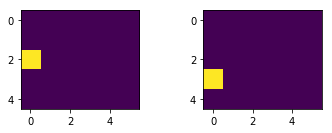

In [9]:
state = stateNum(env.x, env.y)
vState = np.zeros(env.nstate)
vState[state]=1
matState = np.reshape(vState, (env.sizeY, env.sizeX))
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(matState)

vQ = Q[state,:]

vQmax = np.ndarray.max(vQ)    

actionlist = np.arange(naction)
actionMax = np.random.choice(actionlist[vQ == vQmax])
        
if (np.random.uniform(0,1)<epsilon):
    action = np.random.choice(range(naction))
    print("Random")
else:
    action = actionMax
    print("Greedy")
            
#nQ[state, action] +=1
obs, reward, done, info=env.step(action+1)
            
if (stateBefore != None) and (actionBefore != None):
    #Q[state,actionBefore]= (1-alpha)*Q[state,actionBefore] + alpha*(reward + Q[obs,actionMax])
    print(stateNumToCoord(state), dicAction2[action+1])
    print("Qestimates=",Q[state,:])
    #Qsol
    print("Qsol      =",Qsol[state,:])
    #Q[state,actionBefore]= Q[state,actionBefore]+ alpha*(reward + Q[obs,actionMax]-Q[state,actionBefore])
    Q[state,action]= Q[state,action]+ alpha*(reward + max(Q[obs,:])-Q[state,action])
                           
totalReward += reward
            
stateBefore = obs
actionBefore = action

vState = np.zeros(env.nstate)
vState[obs]=1
matState = np.reshape(vState, (env.sizeY, env.sizeX))
import matplotlib.pyplot as plt
plt.subplot(222)
plt.imshow(matState)
plt.show()

In [10]:
Q

array([[-14.46601941, -14.4675764 , -14.4737243 , -14.46961044],
       [-14.2671023 , -14.26649341, -14.27376237, -14.26666949],
       [-13.43167666, -13.47639367, -13.43320866, -13.37661323],
       [-12.62714188, -12.60758387, -12.62013686, -12.17272736],
       [-11.72688168, -11.89064282, -11.65549344, -11.18662628],
       [-10.7881606 , -10.83916613, -10.20893115, -10.72586931],
       [-14.28117758, -14.28750164, -14.2842583 , -14.27974002],
       [-13.91242928, -13.90720716, -13.91580869, -13.90854121],
       [-13.06195064, -13.05418351, -13.06109995, -13.0500494 ],
       [-12.61360938, -12.75074774, -12.6507875 , -12.15795394],
       [-10.19281492, -10.27364686, -10.19236062, -10.18050186],
       [-10.16166267, -10.21588294,  -9.20966733,  -9.80451489],
       [-13.94401443, -13.94343871, -13.94160395, -13.95057226],
       [-14.14426704, -14.14566992, -14.14335098, -14.13662867],
       [-13.50879558, -13.49533689, -13.47503127, -13.21927145],
       [  0.        ,   0

In [11]:
Q-Qsol

array([[-0.52851941, -0.5300764 , -0.5362243 , -1.53211044],
       [-1.3296023 , -0.32899341, -1.33626237, -2.32916949],
       [-1.49417666, -0.53889367, -1.49570866, -2.43911323],
       [-1.68964188, -0.67008387, -1.68263686, -2.23522736],
       [-1.78938168, -0.95314282, -0.03049344, -2.24912628],
       [-1.8506606 , -0.90166613, -2.27143115, -1.78836931],
       [-0.34367758, -0.35000164, -1.18009163, -1.34224002],
       [-0.97492928,  0.03029284, -0.97830869, -1.97104121],
       [-1.12445064, -0.11668351, -1.12359995, -2.1125494 ],
       [-1.67610938, -0.81324774, -1.7132875 , -2.22045394],
       [-0.25531492,  0.66385314,  0.43263938, -1.57633519],
       [-1.22416267,  1.40911706, -2.27216733, -1.86701489],
       [-0.00651443, -0.83927204, -1.83743729, -1.01307226],
       [-1.20676704, -0.4859477 , -1.57390653, -2.19912867],
       [-1.57129558, -0.55783689, -1.53753127, -2.28177145],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.99240241, -0.

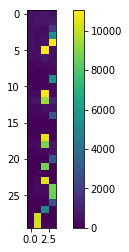

In [12]:
nQ
plt.imshow(nQ)
plt.colorbar()
plt.show()

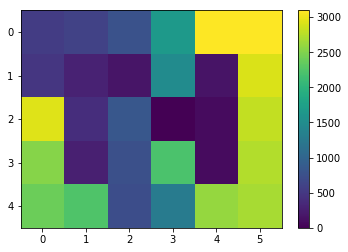

In [13]:
nV = np.ndarray.mean(nQ, axis=1)
matnV = np.reshape(nV, (env.sizeY, env.sizeX))
plt.imshow(matnV)
plt.colorbar()
plt.show()

In [14]:
state = 2
vQ = Q[state,:]
print(vQ)
vQmax = np.ndarray.max(vQ)    
actionlist = np.arange(naction)
actionMax = np.random.choice(actionlist[vQ == vQmax])
print(actionMax)

[-13.43167666 -13.47639367 -13.43320866 -13.37661323]
3


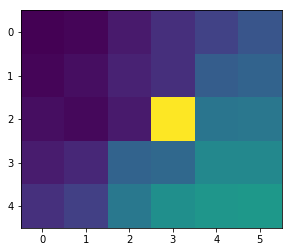

In [15]:
vState = np.ndarray.mean(Q, axis=1)
matState = np.reshape(vState, (env.sizeY, env.sizeX))

import matplotlib.pyplot as plt
plt.imshow(matState)
plt.show()

In [16]:
np.random.uniform(0,1)

0.8364910767502242